# Preprocessing

As we have concluded in our study of the database (EDA) we make some modifications in the Data Frame.

- We eliminate 2 categorical segmentation variables. It is BP and customer BP.
- Age variable. We will eliminate the clients between the age ranges 0-25 and 90 and above.
- Investment Funds and Pension Plans are converted to Boolean variables. (0-1) Has or has not.  

Additionally we work with:

- Label Encoder - Convert categorical variables into numbers.
- Outliers - Revision of possible Ouliers
- Normalization - Bring all variables to a common scale.
- PCA Possible simplification of variables by reducing dimensionality to database.

We are going to save three different csv's for use in the different models


In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('D:/Masters y Cursos/TFM/Financial-Product-Sales-Forecast-Model/Cleanning & Merging/df_cleanned.csv')

### LABEL ENCODER

Based on EDA performed, within segmentation variables we keep only 5 which we have to transform to number to be able to use them in the model.

In [4]:
variables_segmentacion =['seg_valor','camino_digital','seg_recorrido','marca_ccte','marca_bp']


In [5]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()

In [6]:
for segmento in variables_segmentacion:
    df[segmento]=lbl.fit_transform(df[segmento])

In [7]:
# We confirm that the transformation has been performed correctly. 
df['seg_valor'].value_counts()

0    249593
2    134911
1     66870
Name: seg_valor, dtype: int64

In [8]:
df['seg_valor'].unique()

array([0, 2, 1])

## Variables adaptation

In [9]:
# We eliminate customers from 0 to 24 years old and over 90 years old.
inf25 = df[df['edad'] < 25].index
# Delete these row indexes from dataFrame
df.drop(inf25 , inplace=True)

In [10]:
# We eliminate customers over 90 years old
sup90 = df[df['edad'] > 90].index
# Delete these row indexes from dataFrame
df.drop(sup90 , inplace=True)

In [11]:
df['edad'].describe()

count    417812.000000
mean         59.915787
std          16.207368
min          25.000000
25%          48.000000
50%          61.000000
75%          73.000000
max          90.000000
Name: edad, dtype: float64

### Age Outliers

We have seen during the exploration of the data set that there are several variables that are susceptible to Outliers. These are 'age', 'catchment_balance', 'funding_balance', 'effii_balance', 'plp_balance'. 

- Capture Variable. These are real values. We do not want to eliminate outliers. We only modify the negative ones and give them a value of 0 Euros.
- Investment funds and pension plans. We will transform to boolean value 0-1 "Has not Has.
- Funding is a variable that by its nature we do not want to modify.

- Age variable. It is the only one that can have real ouliers.  We have previously eliminated customers between 0-25 years old and over 90 years old, so probably the Outlier are already worked. 

__Age Variable__

We make the visualization with a histogram and a BoxPlot. With the latter we confirm that we have no Outliers.

In [12]:
import matplotlib.pyplot as plt
import pylab as pl

<AxesSubplot:>

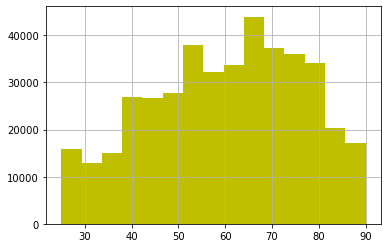

In [13]:
df['edad'].hist(color = 'y', bins = 15)

Boxplot edad


<function matplotlib.pyplot.show(close=None, block=None)>

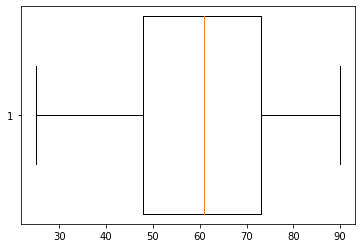

In [14]:
print ('Boxplot edad')
plt.boxplot(df['edad'],vert = False, widths = 2)
plt.show   


In [15]:
df['edad'].describe()

count    417812.000000
mean         59.915787
std          16.207368
min          25.000000
25%          48.000000
50%          61.000000
75%          73.000000
max          90.000000
Name: edad, dtype: float64

In [16]:
# Transform variable Future savings Plans 0 Don't have - 1 Yes have
df['saldo_plp'] = df['saldo_plp'].apply(lambda x: 1 if x > 0 else 0)
pd.value_counts(df['saldo_plp'], normalize = True)

0    0.888785
1    0.111215
Name: saldo_plp, dtype: float64

In [17]:
# Transform variable Investment Funds 0 Don't have 1 Yes have
df['saldo_ffii'] = df['saldo_ffii'].apply(lambda x: 1 if x > 0 else 0)
pd.value_counts(df['saldo_ffii'], normalize = True)

0    0.859183
1    0.140817
Name: saldo_ffii, dtype: float64

In [18]:
# Savings Variable
customers_with_negative_balances = df[df['saldo_captacion'] < 0]['cliente'].nunique()
customers_percent_with_negative_balances  = df[df['saldo_captacion'] < 0]['cliente'].nunique() / df['cliente'].count()
print ('customers_with_negative_balances :',customers_with_negative_balances)
print ('customers_percent_with_negative_balances: ',customers_percent_with_negative_balances)

customers_with_negative_balances : 8828
customers_percent_with_negative_balances:  0.021129120274190307


In [19]:
# We do not want negative values. We give them a value of zero.
df[df['saldo_captacion'] < 0] = 0

In [20]:
df['saldo_captacion'].describe()

count    4.178120e+05
mean     5.194882e+04
std      8.914284e+04
min      0.000000e+00
25%      2.189145e+03
50%      1.787874e+04
75%      6.811098e+04
max      5.290216e+06
Name: saldo_captacion, dtype: float64

In [21]:
df=df[['saldo_captacion','saldo_financiacion','edad','seg_valor','saldo_ffii', 'saldo_plp', 
      'lp_dom_ingresos','camino_digital','seg_recorrido','marca_ccte','lp_seg_vida',
       'lp_seg_auto','marca_bp','lp_tjta_cto', 'lp_tjt_rev','lp_seg_acc','lp_seg_hogar']]

In [22]:
df.sample(5)

,saldo_captacion,saldo_financiacion,edad,seg_valor,saldo_ffii,saldo_plp,lp_dom_ingresos,camino_digital,seg_recorrido,marca_ccte,lp_seg_vida,lp_seg_auto,marca_bp,lp_tjta_cto,lp_tjt_rev,lp_seg_acc,lp_seg_hogar
101019,118270.64,60.74,89.0,0,1,0,1,3,2,0,0,0,1,1,0,0,0
427889,16487.74,32298.12,27.0,2,0,1,0,3,2,2,1,0,0,0,0,0,0
39035,98347.74,486.24,44.0,0,0,0,1,4,2,0,0,0,1,1,0,0,0
329321,16994.08,116.51,49.0,2,0,0,1,1,0,0,0,0,0,1,0,0,0
99527,59070.26,368.40,43.0,0,0,0,1,4,0,0,0,0,1,1,0,0,0


In [23]:
# Save to csv
df.to_csv('df_encoded.csv', index = False)

### NORMALIZATION

Bring all variables to a common scale. For this we use MinMaxScaler.

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler = MinMaxScaler()

In [26]:
df_normalized = scaler.fit_transform(df)

In [27]:
columnas = df.columns

In [28]:
df_normalized = pd.DataFrame(df_normalized, columns=columnas)

In [29]:
df_normalized.head(3)

,saldo_captacion,saldo_financiacion,edad,seg_valor,saldo_ffii,saldo_plp,lp_dom_ingresos,camino_digital,seg_recorrido,marca_ccte,lp_seg_vida,lp_seg_auto,marca_bp,lp_tjta_cto,lp_tjt_rev,lp_seg_acc,lp_seg_hogar
0,0.251050,0.001689,0.766667,0.0,1.0,1.0,1.0,0.00,0.333333,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,0.215915,0.001689,0.900000,0.0,1.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.215915,0.001689,0.833333,0.0,1.0,0.0,0.0,0.75,0.333333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# save to csv
df_normalized.to_csv('df_normalized.csv', index = False)

In [31]:
df_normalized.columns

Index(['saldo_captacion', 'saldo_financiacion', 'edad', 'seg_valor',
       'saldo_ffii', 'saldo_plp', 'lp_dom_ingresos', 'camino_digital',
       'seg_recorrido', 'marca_ccte', 'lp_seg_vida', 'lp_seg_auto', 'marca_bp',
       'lp_tjta_cto', 'lp_tjt_rev', 'lp_seg_acc', 'lp_seg_hogar'],
      dtype='object')

### PCA 

PCA is not necesary but i study it to try with the models. 

There ar only 17 variables that we will try to reduce using PCA to reduce the dimensionality. We will compare if the use of PCA improves or not the result.


In [32]:
from sklearn.decomposition import PCA

In [33]:
df_without_target = df_normalized.drop(['lp_seg_hogar'], axis = 1)

In [34]:
# PCA object and we apply
pca = PCA(15) # n =  ponemos como numero de pcas 15
pca.fit(df_without_target) # obtener los componentes principales
df_transforming = pca.transform(df_without_target) # convertimos nuestros datos con las nuevas dimensiones de PCA

In [35]:
pca.components_[14]

array([-4.11889824e-01,  9.10978607e-01,  1.31662563e-02,  4.99907493e-03,
        6.37255850e-03, -2.56658482e-03,  2.33568088e-04, -2.65712748e-03,
       -5.83886051e-03, -8.93539668e-05, -7.27455382e-03, -1.60054293e-03,
        9.98998533e-03,  1.29828400e-05, -6.78979411e-04, -4.71761888e-03])

In [36]:
list(zip(df_without_target.columns, df_transforming[0]))

[('saldo_captacion', 1.0054773583346235),
 ('saldo_financiacion', 0.07789250191949051),
 ('edad', 0.38502292690306356),
 ('seg_valor', 0.3286855505328109),
 ('saldo_ffii', 0.5270259475547889),
 ('saldo_plp', 0.6200945446767393),
 ('lp_dom_ingresos', 0.9559897775616004),
 ('camino_digital', 0.11185132567008972),
 ('seg_recorrido', -0.10035165555479407),
 ('marca_ccte', -0.07430516952388962),
 ('lp_seg_vida', -0.37074753350110984),
 ('lp_seg_auto', -0.15791956357291642),
 ('marca_bp', -0.08083767823818092),
 ('lp_tjta_cto', -0.06358558882372542),
 ('lp_tjt_rev', -0.10212594774301068)]

In [37]:
print("shape of X_pca", df_transforming.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('sum:',sum(expl[0:15]))
#We see that with the 15 components we have 99% of variance explained. That is why we dont need PCA.

shape of X_pca (417812, 15)
[2.43541531e-01 1.83785848e-01 1.14700429e-01 7.90322361e-02
 6.41066674e-02 6.02483731e-02 5.63915734e-02 4.43985341e-02
 4.40507526e-02 3.96533603e-02 3.31396132e-02 1.74401388e-02
 1.11996421e-02 8.10258599e-03 1.14564222e-04]
sum: 0.9999058499657828


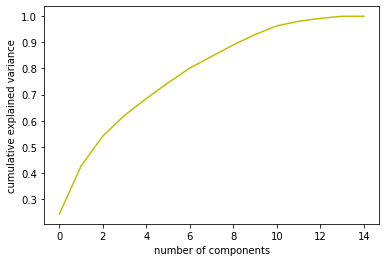

In [38]:
#We plot the cumulative variance explained in the new dimensions.
plt.plot(np.cumsum(pca.explained_variance_ratio_), color = 'y')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show() 

In [39]:
# We give a name to each column of the DF once the PCA has been performed.
df_pca = pd.DataFrame (data = df_transforming, columns = ['var_pca_1','var_pca_2','var_pca_3',
                                                          'var_pca_4','var_pca_5','var_pca_6',
                                                          'var_pca_7','var_pca_8','var_pca_9',
                                                          'var_pca_10','var_pca_11','var_pca_12',
                                                          'var_pca_13','var_pca_14','var_pca_15'])                          
                                                          

In [40]:
# Unimos nuestro Target al DF con PCA realizado.
df_normalized_pca = pd.concat ([df_pca, df_normalized [['lp_seg_hogar']]], axis = 1)

In [41]:
df_normalized_pca.to_csv('df_normalized_pca.csv', index = False)